In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,discriminant_analysis,cross_validation

In [18]:
# 加载数据方法，这里使用scikit-learn自带的鸢尾花分类数据
def load_data():
    iris = datasets.load_iris()
    # stratify参数将按照分类比例进行拆分数据
    return cross_validation.train_test_split(iris.data, iris.target,test_size=0.25,random_state=0,stratify=iris.target)

In [19]:
# LDA模型
def test_LinearDiscriminantAnalysis(*data):
    train_x,test_x, train_y, test_y = data
    lda= discriminant_analysis.LinearDiscriminantAnalysis()
    lda.fit(train_x, train_y)
    
    # y=wx+b  分别显示权重及b值
    print('【权重】coefficient:{0}'.format(lda.coef_))
    print('【b值】intercept: {0}'.format(lda.intercept_))
    # 均方差
    print('【均方差】residual sum of squares:{0}'.format(np.mean((lda.predict(test_x) -test_y)**2)))
    # 成绩
    print('【成绩】Testing Score: {0}'.format(lda.score(test_x,test_y)))

In [20]:
# 测试
train_x,test_x, train_y, test_y = load_data()
test_LinearDiscriminantAnalysis(train_x, test_x, train_y, test_y)

【权重】coefficient:[[  6.575853     9.75807593 -14.34026669 -21.39076537]
 [ -1.98385061  -3.49791089   4.21495042   2.60304299]
 [ -4.47116022  -6.09542385   9.85886057  18.29330864]]
【b值】intercept: [-15.33097142   0.46730077 -30.53297367]
【均方差】residual sum of squares:0.0
【成绩】Testing Score: 1.0


In [45]:
def plot_LDA(cocnverted_X,y):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = Axes3D(fig)
    colors='rgb'
    markers='o*s'
    for target,color,marker in zip([0,1,2],colors,markers):
        pos=(y==target).ravel()
        X=cocnverted_X[pos,:]
        ax.scatter(X[:,0],X[:,1],X[:,2],color=color,marker=marker,label='Lebel {0}'.format(target))
        ax.legend(loc='best')
        fig.suptitle('Iris After LDA')
    plt.show()

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


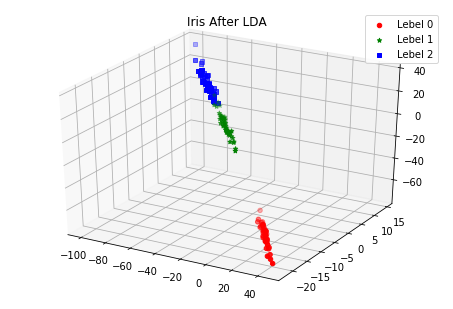

In [46]:
# 测试
train_x,test_x, train_y, test_y = load_data()
X=np.vstack((train_x, test_x))
Y=np.vstack((train_y.reshape(train_y.size,1),test_y.reshape(test_y.size,1)))
lda= discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X,Y)
cocnverted_X = np.dot(X, np.transpose(lda.coef_))+lda.intercept_
plot_LDA(cocnverted_X,Y)

In [50]:
# LDA中 solver对结果的影响
def test_LinearDiscriminantAnalysis_solver(*data):
    train_x,test_x, train_y, test_y = data
    solvers = ['svd','lsqr','eigen']
    for solver in solvers:
        if solver == 'svd':
            lda = discriminant_analysis.LinearDiscriminantAnalysis(solver=solver)
        else:
            lda = discriminant_analysis.LinearDiscriminantAnalysis(solver=solver, shrinkage=None)
        
        lda.fit(train_x, train_y)
        # 成绩
        print('【{0}成绩】Testing Score: {1}'.format(solver,lda.score(test_x,test_y)))

In [51]:
# 测试
train_x,test_x, train_y, test_y = load_data()
test_LinearDiscriminantAnalysis_solver(train_x, test_x, train_y, test_y)

【svd成绩】Testing Score: 1.0
【lsqr成绩】Testing Score: 1.0
【eigen成绩】Testing Score: 1.0


In [60]:
# lsqr中引入抖动，相当于正则化项 观察 抖动对预测结果的影响
def test_LinearDiscriminantAnalysis_shrinkage(*data):
    train_x,test_x, train_y, test_y = data
    shrinkages=np.linspace(0.0,1.0,num=100)
    scores=[]
    for shrinkage in shrinkages:
        lda = discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shrinkage)
        lda.fit(train_x, train_y)
        scores.append(lda.score(test_x,test_y))
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(shrinkages,scores, label='Testing Score')
    ax.set_xlabel(r'shrinkage')
    ax.set_ylabel(r'score')
    ax.set_ylim(0.8,1.05)
    ax.set_title('LinearDiscriminantAnalysis')
    plt.show()

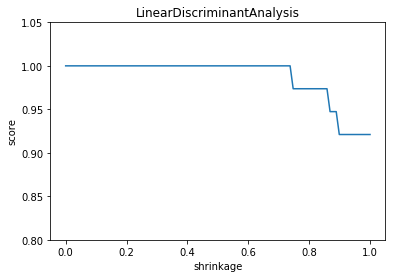

In [61]:
# 测试
train_x,test_x, train_y, test_y = load_data()
test_LinearDiscriminantAnalysis_shrinkage(train_x, test_x, train_y, test_y)